In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rcParams['font.size']=22

In [6]:
sens = lambda k, ord: np.linalg.norm(np.ones(k), ord=ord)

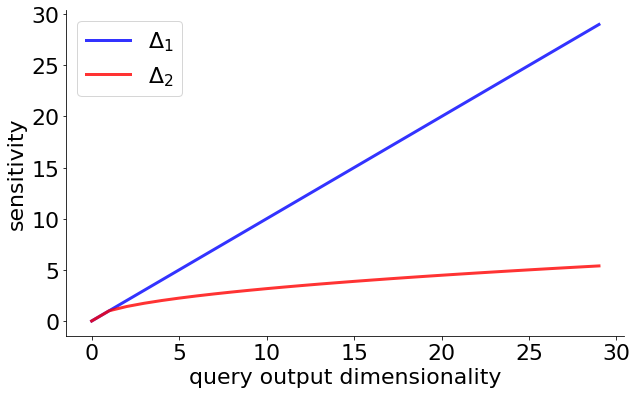

In [7]:
n_max = 30
plt.figure(figsize=(10, 6))
plt.plot([sens(i, 1) for i in range(n_max)], label='$\Delta_1$', alpha=0.8, c='blue', lw=3)
plt.plot([sens(i, 2) for i in range(n_max)], label='$\Delta_2$', c='red',alpha=0.8, lw=3)
plt.legend()
plt.xlabel("query output dimensionality")
plt.ylabel("sensitivity")
sns.despine()
plt.savefig("../figures/lap_vs_gauss.pdf")

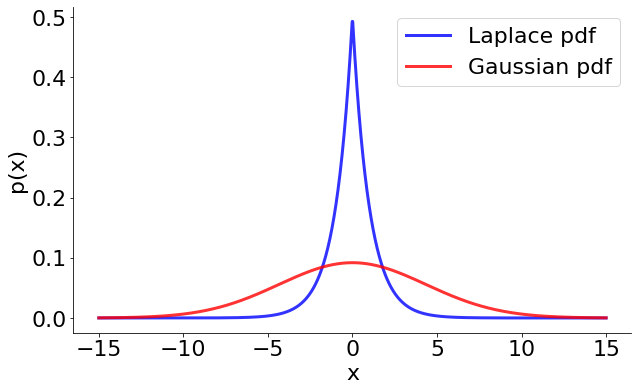

In [4]:
from scipy.stats import laplace, norm

delta = 10e-5
sigma = np.sqrt(2 * np.log(1.25 / delta)) * 1 / 1

plt.figure(figsize=(10, 6))
x = np.linspace(-15, 15, 1000)
plt.plot(x, laplace.pdf(x, loc=0, scale=1),c='blue', lw=3, alpha=0.8, label='Laplace pdf')
plt.plot(x, norm.pdf(x, loc=0, scale=sigma),c='red', lw=3, alpha=0.8, label='Gaussian pdf')
sns.despine()
plt.legend()
plt.xlabel("x")
plt.ylabel("p(x)")
plt.savefig("../figures/lap_gauss.pdf")
plt.show()

# Rényi DP vs. advanced composition

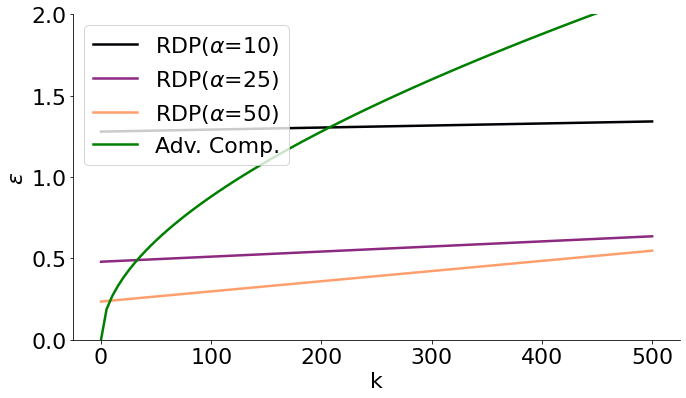

In [62]:
sigma = 200.0
delta = 1e-5
xs = np.linspace(0, 500, 100)

gauss_eps = np.sqrt(2 * np.log(1.25/delta) / sigma**2)
ys_gauss_adv = [x * (gauss_eps**2) + (gauss_eps*np.sqrt(x * np.log(1/delta))) for x in xs]
ys_gauss_comp_theorem = [x * (gauss_eps**2) + (gauss_eps*np.sqrt(x * np.log(np.e + (gauss_eps*(np.sqrt(x)/delta))))) for x in xs]
rho = 1/(2*sigma**2)

plt.figure(figsize=(10,6))
alphas = [10, 25, 50]
cmap = mpl.cm.get_cmap('magma')
c = np.linspace(0, 0.8, len(alphas))
for i, alpha in enumerate(alphas):
    rdp_eps = alpha / (2*sigma**2)
    ys_gauss_rdp = [(x*rdp_eps) + np.log(1/delta)/(alpha-1) for x in xs]
    label = str(f'RDP($\alpha$={alpha})')
    plt.plot(xs, ys_gauss_rdp, color=cmap(c[i]), lw=2.5, label=r"RDP($\alpha$=%d)" % alpha)

plt.plot(xs, ys_gauss_adv, label="Adv. Comp.", c='green', lw=2.5,)
#plt.plot(xs, ys_gauss_comp_theorem, label="Comp. Theorem", c='green', lw=2.5,)


plt.xlabel('k')
plt.ylabel('$\epsilon$')
plt.ylim(0, 2.0)
sns.despine()
plt.legend()
plt.tight_layout()
plt.savefig("../figures/renyi_dpvs_adv_comp.pdf")
plt.show()